In [1]:
import json

In [2]:
with open('../总成语表.json', 'r', encoding='utf-8') as file:
    dict_total = json.load(file)

In [9]:
dict_py = {}
for phones in dict_total.values():
    phone_list = phones.split(' ')
    for phone in phone_list:
        if not phone in dict_py.keys():
            dict_py[phone] = 1
        else:
            dict_py[phone] += 1

In [11]:
import pandas as pd

In [12]:
df_py = pd.Series(dict_py)

In [13]:
df_py.sort_values()

cui3        1
rong1       1
ao1         1
shua3       1
nan3        1
         ... 
xin1     1149
shi4     1219
yi1      1358
zhi1     1635
bu4      2260
Length: 1149, dtype: int64

In [21]:
len(df_py.sort_values())

1149

In [22]:
df_py_sort = df_py.sort_values()

In [25]:
df_py_sort[df_py_sort >= 15]

huai4      15
niu3       15
fou3       15
qing3      15
te4        15
         ... 
xin1     1149
shi4     1219
yi1      1358
zhi1     1635
bu4      2260
Length: 872, dtype: int64

In [24]:
df_py.sort_values().quantile(0.25)

15.0

<AxesSubplot:>

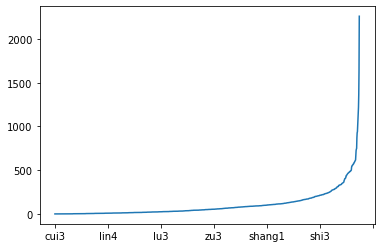

In [26]:
df_py.sort_values().plot()

In [28]:
pd.Series.to_csv(df_py_sort, '../pinyin_frequency.csv', sep=' ')

In [33]:
df_py_sort.quantile(0.2)

11.0

In [34]:
quantile_20_percent = df_py_sort.quantile(0.2)

In [36]:
with open('../answers.txt', 'w', encoding='utf-8') as outfile:
    for index in df_py_sort[df_py_sort >= 10].index:
        outfile.write(index+'\n')